# Домашнее задание № 5

В данной работе я работаю с данными из дипломной работы. Данные имеются в открытом доступе:

https://science.bostongene.com/kassandra/downloads

В частности, здесь используются 45 образцов Bulk RNA-seq для крови (таблица expr_table). Единица измерения экспрессий - TPM. В каждом из образцов мы также знаем долю различных типок клеток по результатам цитометрии (таблица prop_table).

In [256]:
library(readr)

prop_table <- read_tsv("BG_blood_cytometry.tsv", show_col_types = FALSE)
expr_table <- read_tsv("BG_blood_expressions.tsv", show_col_types = FALSE)

New names:
• `` -> `...1`


### Распределение долей некоторых основных иммунных и стромальных типов клеток в образцах.

In [173]:
head(prop_table)

...1,Neutrophils,T_cells,Eosinophils,Monocytes,B_cells,NK_cells,Basophils,PDC,Granulocytes,⋯,Class_switched_memory_B_cells,CD8_T_cells,CD4_T_cells,Naive_CD8_T_cells,Memory_CD8_T_cells,TEMRA_CD8_T_cells,Central_memory_CD8_T_cells,Effector_memory_CD8_T_cells,Transitional_memory_CD8_T_cells,Dendritic_cells
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F0303,65.35769,14.729883,4.868582,8.060685,3.177866,2.482497,0.7051101,0.009241613,70.93138,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.6176894
F0304,59.76293,16.624683,6.284414,6.955060,1.830591,6.611164,1.2080847,0.120676580,67.25543,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.7230703
F0305,68.37617,10.235667,4.807129,10.117843,2.494479,2.981150,0.5456793,0.086493718,73.72897,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.4418868
F0306,60.55696,13.561130,6.439274,9.663453,2.370700,5.563592,1.1569230,0.175270980,68.15316,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.6879638
F0307,65.76893,8.802754,5.985734,12.994177,1.935929,3.154627,0.7130288,0.104050300,72.46770,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.6448153
F0308,48.96111,16.419571,9.197016,13.565648,2.409496,6.872550,1.8864660,0.180440274,60.04459,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.6881448


In [172]:
cells_types = c('Neutrophils', 'T_cells', 'Eosinophils', 'Monocytes', 'B_cells')

prop_table_sliced = prop_table[cells_types]
head(prop_table_sliced)

Neutrophils,T_cells,Eosinophils,Monocytes,B_cells
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
65.35769,14.729883,4.868582,8.060685,3.177866
59.76293,16.624683,6.284414,6.955060,1.830591
68.37617,10.235667,4.807129,10.117843,2.494479
60.55696,13.561130,6.439274,9.663453,2.370700
65.76893,8.802754,5.985734,12.994177,1.935929
48.96111,16.419571,9.197016,13.565648,2.409496


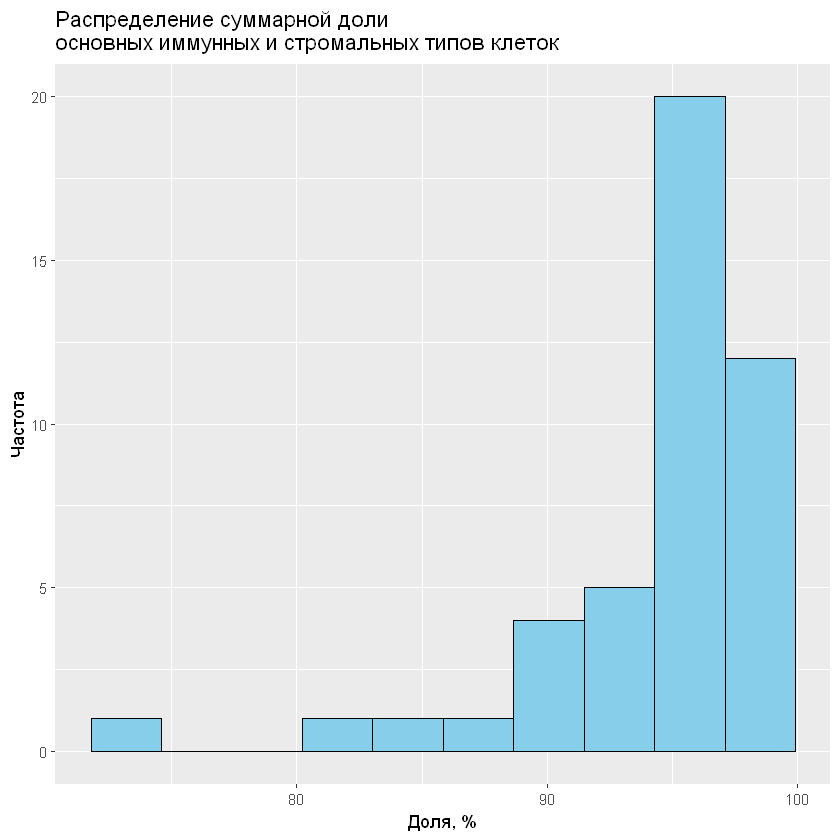

In [137]:
ggplot() + 
aes(rowSums(prop_table_sliced)) + 
geom_histogram(bins = 10, colour="black", fill="skyblue") + 
labs(title = "Распределение суммарной доли \nосновных иммунных и стромальных типов клеток", x = "Доля, %", y = "Частота")

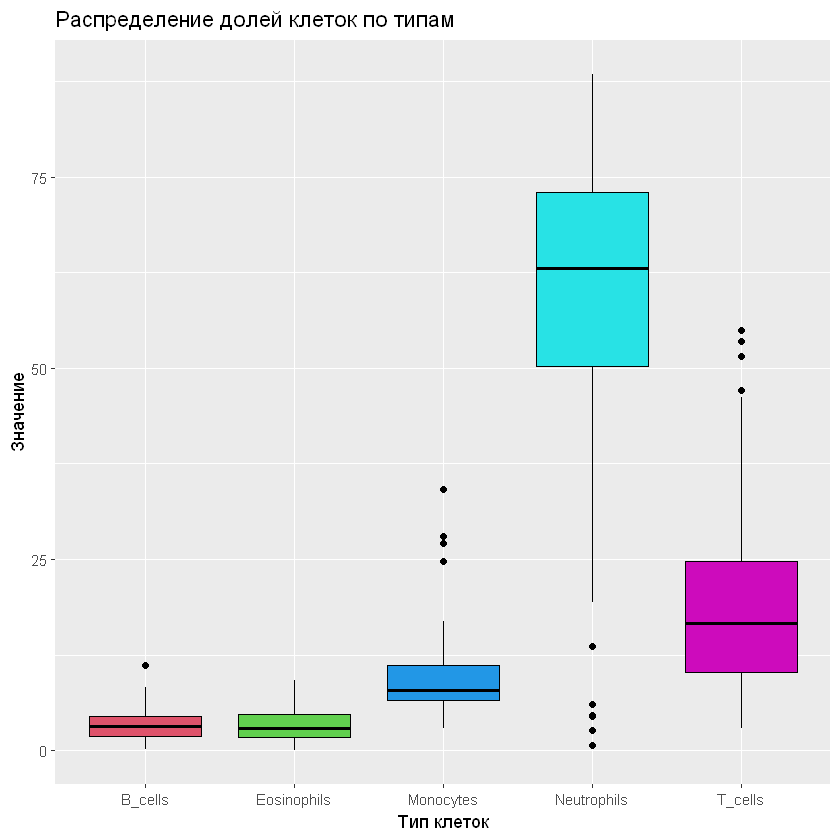

In [165]:
dataframe_long <- gather(prop_table_sliced, key = "variable", value = "value")

ggplot(data = dataframe_long, aes(x = variable, y = value)) +
  geom_boxplot(color = 1, fill = c(2,3,4,5,6)) +
  labs(title = "Распределение долей клеток по типам", x = "Тип клеток", y = "Значение")

### Распределение экспрессий в TPM

In [171]:
head(expr_table)

Gene,210514_NovaA_Sample_119,210514_NovaA_Sample_125,210514_NovaA_Sample_126,210514_NovaA_Sample_127,210514_NovaA_Sample_128,210514_NovaA_Sample_129,210514_NovaA_Sample_130,210514_NovaA_Sample_131,210514_NovaA_Sample_155,⋯,210526_NovaB_Sample_31,210526_NovaB_Sample_32,210526_NovaB_Sample_4,210526_NovaB_Sample_5,210526_NovaB_Sample_6,210526_NovaB_Sample_7,210526_NovaB_Sample_8,210526_NovaB_Sample_9,210423_NovaB_Sample_11,210423_NovaB_Sample_12
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,0.0000000,0.1008138,0.07463937,0.11863530,0.00000000,0.12404990,0.05622084,0.00000000,0.11904644,⋯,0.1540329,0.05213075,0.25420261,0.11916153,0.00000000,0.00000000,0.0000000,0.27306098,0.00000000,0.00000000
A1CF,0.3672601,0.2211464,0.11617910,0.07796177,0.10721909,0.10835870,0.11438411,0.15115279,0.36648967,⋯,0.2171982,0.28317918,0.17841843,0.20939012,0.12967700,0.15452019,0.1252244,0.28609477,0.17769321,0.14566191
A2M,7.4541321,13.0579971,5.11386311,4.72749612,3.47274709,3.82837657,3.78872179,2.16133545,1.36048288,⋯,0.9798571,6.11944873,4.68333805,4.70368936,3.09146594,3.38071121,6.5612474,4.57806476,5.02989551,5.32083877
A2ML1,1.3693672,1.6826913,1.66367976,1.04327963,0.93674521,1.49374691,0.89673778,1.21179526,1.47976041,⋯,1.3424449,0.86055498,1.28982498,0.86523597,0.70596671,1.00981515,2.0820322,0.84543268,1.18776717,1.56263761
A4GALT,0.0000000,0.3701377,0.03389242,0.17557934,0.08591165,0.09255274,0.00000000,0.09087823,0.11825650,⋯,0.0000000,0.00000000,0.05747761,0.02707345,0.08688749,0.00000000,0.1659785,0.02666352,0.00000000,0.03736067
A4GNT,0.0000000,0.3453673,0.18671575,0.00000000,0.25249272,0.34008416,0.11491994,0.05007534,0.08699281,⋯,0.0000000,0.21011771,0.15861238,0.02987935,0.03196338,0.03405405,0.0000000,0.08822700,0.04594706,0.08237894


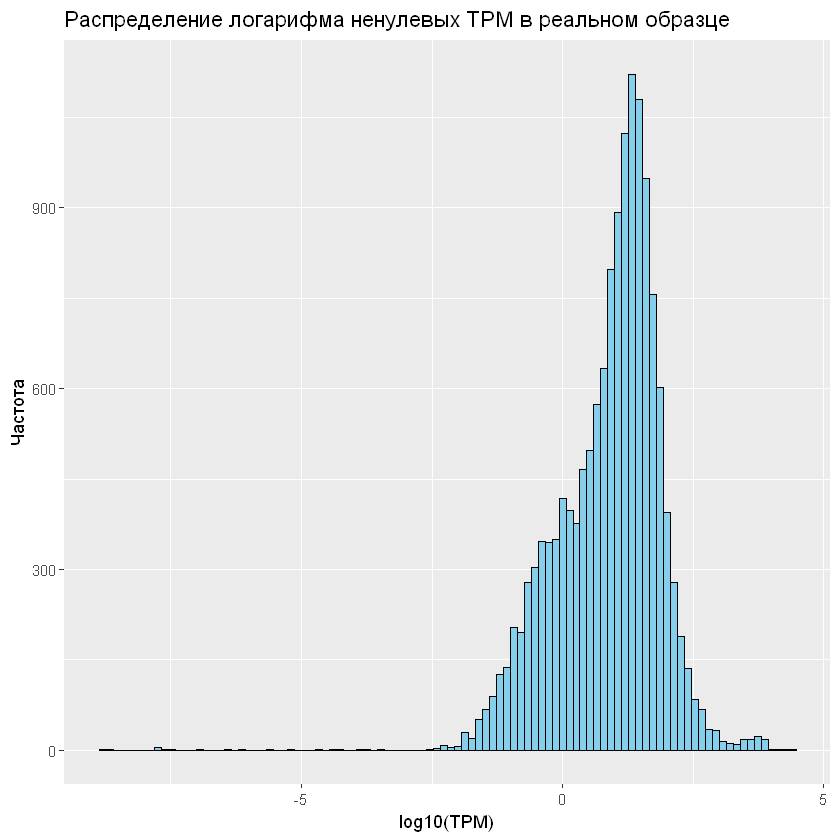

In [230]:
ggplot() + 
aes(log10(sample[sample != 0])) + 
geom_histogram(bins = 100, colour="black", fill="skyblue") + 
labs(title = "Распределение логарифма ненулевых TPM в реальном образце", x = "log10(TPM)", y = "Частота")